In [1]:
import polars as pl
import numpy as np
import dsds.metrics as me
import dsds.prescreen as ps
import dsds.sample as sa
import dsds.fs as fs
import dsds.transform as t
import numpy as np 

In [2]:
import dsds.compare as comp

In [10]:
df = pl.read_csv("../data/providers.csv")
df.head()

Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
str,str,str,str,str,str,str,str,str,f64,f64,i64
"""3421aa75-dec7-…","""ef58ea08-d883-…","""Tomas436 Sauer…","""M""","""GENERAL PRACTI…","""60 HOSPITAL RO…","""LEOMINSTER""","""MA""","""01453""",42.520838,-71.770876,1557
"""c9b3c857-2e24-…","""69176529-fd1f-…","""Suzette512 Mon…","""F""","""GENERAL PRACTI…","""330 MOUNT AUBU…","""CAMBRIDGE""","""MA""","""02138""",42.375967,-71.118275,2296
"""0359f968-d1a6-…","""5e765f2b-e908-…","""Gaynell126 Str…","""F""","""GENERAL PRACTI…","""211 PARK STREE…","""ATTLEBORO""","""MA""","""02703""",41.931653,-71.294503,2287
"""446d1609-858f-…","""f1fbcbfb-fcfa-…","""Patricia625 Sa…","""F""","""GENERAL PRACTI…","""ONE GENERAL ST…","""LAWRENCE""","""MA""","""01842""",42.700273,-71.161357,1327
"""e6283e46-fd81-…","""e002090d-4e92-…","""Jeanmarie510 B…","""F""","""GENERAL PRACTI…","""1493 CAMBRIDGE…","""CAMBRIDGE""","""MA""","""02138""",42.375967,-71.118275,3199


In [23]:
cols = ["Id", "ORGANIZATION", "NAME", "GENDER", "ADDRESS", "CITY", "SPECIALITY", "STATE", "ZIP", "UTILIZATION", "LON", "LAT"] # "LAT", "LON"]
# cols = ["Id","STATE", "ZIP", "UTILIZATION", "LAT", "LON"]
entropy, tree = comp.dependency_detection(df, cols=cols, threshold=0.015)

INFO:dsds.compare:The following columns are not considered because they are constants: ['STATE']


In [24]:
entropy.filter(pl.col("y") == "ADDRESS")

x,y,H(x|y)
str,str,f64
"""GENDER""","""ADDRESS""",0.575461
"""SPECIALITY""","""ADDRESS""",1.535774
"""UTILIZATION""","""ADDRESS""",0.286909
"""CITY""","""ADDRESS""",0.004831
"""LON""","""ADDRESS""",0.003622
"""LAT""","""ADDRESS""",0.00421
"""ZIP""","""ADDRESS""",0.016661


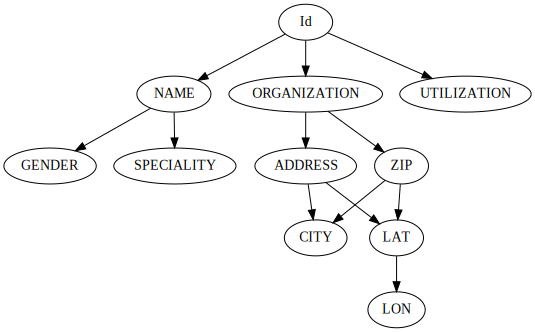

In [25]:
tree

In [ ]:
tree

In [ ]:
entropy = entropy.filter(pl.col("H(x|y)") < 0.05)

In [ ]:
actual = np.round(np.random.random(size=500_000)).astype(np.int8)
predicted = np.random.random(size=500_000)


In [ ]:
import numpy as np
df = pl.DataFrame({
    "a": np.random.random(size=100_000)
})

# np.random.random(size=100_000)

In [ ]:
df = pl.read_parquet("../data/dunnhumby.parquet")
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.75)

In [ ]:
train, test = train_test_split(df, train_size=0.75)

In [ ]:
df = pl.DataFrame({
    "text1":["abc,ggg", "abc,sss", "ccc,abc"],
    "text2":["aaa,bbb", "ccc,aaa", "bbb,ccc"]
})

In [ ]:
ps.infer_multicategorical(df, separator=",")

In [ ]:
df = pl.DataFrame({
    "time": ["2021-01-01", "2021-01-03", "2021-02-01","2021-02-11","2021-03-01","2021-03-02"],
    "a1": [None, 1,2,3,4, None,],
    "a2": [1,2, None,3,4, None,],
})
df = df.with_columns(pl.col("time").str.to_date())
ps.over_time_report(df, cols=["a1", "a2"], time_col="time", metrics=["null", "invalid", "min", "max"])

In [ ]:
df.select(
    pl.when(pl.col("a1")==1).then("a").when(pl.col("a2")==2).then("b").otherwise("c")
)

In [ ]:
df2 = pl.concat([df for _ in range(10000)])
df2.shape

In [ ]:
%%timeit
for frames in sa.time_window_slide(df2, "time", interval="monthly",length=3):
    first, second, third = frames

In [ ]:
df = pl.concat([pl.read_csv("../data/advertising.csv") for _ in range(10)])

In [ ]:
fs.ks_statistic(df, target="Clicked on Ad")

In [ ]:
from dsds.sklearn_compat_transfom import PolarsExprTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output = "pandas")

In [ ]:
df = df.select("Daily Time Spent on Site", "Age", "Area Income", "Male", "Clicked on Ad")

In [ ]:
df

In [ ]:
exprs = [pl.col("Age").log(), (pl.col("Clicked on Ad") + pl.lit(2)).alias("test_pl")]
pipe = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("exprs", PolarsExprTransformer(exprs))
])

In [ ]:
pipe.fit(df.to_pandas())

In [ ]:
pipe.transform(df.to_pandas())

In [ ]:
df.group_by("One_Hot_Test").count()

In [ ]:
pl.show_versions()

In [ ]:
def test(value: lambda x: x+1):
    return value 

In [ ]:
test(1)

In [ ]:
test = pl.DataFrame(
    {
        "a":[["a", None], ["b", None]]
    }
)

test.select(
    pl.col("a").list.set_difference(pl.Series("test", [None]))
)

In [ ]:
df = pl.read_csv("../data/advertising.csv")
df.head()

In [ ]:
a = np.random.random(size=(5000,))
b = np.random.random(size=(5000,))

In [ ]:
me.psi(a,b)

In [ ]:
predicted = np.random.random(size=(5000,3))
actual = np.round(np.random.random(size=(5000,3))).astype(np.int8)

In [ ]:
me.precision_recall(actual, predicted)

In [ ]:
df = pl.DataFrame({
    "predicted": predicted[:, 1],
    "actual": actual[:, 1]
})

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(actual, predicted, average="weighted"))
print(me.roc_auc(actual, predicted, strategy="balanced"))

In [ ]:
df2 = (
    df.lazy().select(["Area Income", "Ad Topic Line", "City", "Clicked on Ad"])
    .drop(["Ad Topic Line"])
).collect()

In [ ]:
df2.show_graph()

In [ ]:
from scipy.fft import fft
a = np.array([1,2,3,1,2,3,1,2,3])
fft(a)

In [ ]:
df = pl.read_csv("../data/train.csv").with_columns(
    pl.lit(1).alias("feature_1"),
    pl.lit(2).alias("feature_2")
)